# Regression Analysis

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

In [1]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import timedelta
from datetime import date

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
sns.set_theme(context='notebook', 
              style='dark' , 
              palette='deep')

## EDA

In [3]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

In [4]:
print(df0.shape)
print()
print(df0.info())

(22699, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  fl

In [5]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print('Shape of df0 with no duplicates for comparison with full df0:' , df0.drop_duplicates().shape)
print()
print(df0.isna().sum())

Shape of df0 with no duplicates for comparison with full df0: (22699, 18)

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [6]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


---
**Convert pickup & dropoff columns to datetime**

In [7]:
print(df0['tpep_pickup_datetime'][0:5])
print()
print('_' * 50)
print()
print(df0['tpep_dropoff_datetime'][0:5])

0     03/25/2017 8:55:43 AM
1     04/11/2017 2:53:28 PM
2     12/15/2017 7:26:56 AM
3     05/07/2017 1:17:59 PM
4    04/15/2017 11:32:20 PM
Name: tpep_pickup_datetime, dtype: object

__________________________________________________

0     03/25/2017 9:09:47 AM
1     04/11/2017 3:19:58 PM
2     12/15/2017 7:34:08 AM
3     05/07/2017 1:48:14 PM
4    04/15/2017 11:49:03 PM
Name: tpep_dropoff_datetime, dtype: object


In [8]:
# Convert datetime columns to datetime
df1 = df0.copy()

df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

In [9]:
print(df1['tpep_pickup_datetime'][0:5])
print()
print('_' * 50)
print()
print(df1['tpep_dropoff_datetime'][0:5])
print()
print('_' * 50)
print()
print(df1['tpep_pickup_datetime'][0:5].dt.month)
print()
print('_' * 50)
print()
print(df1['tpep_dropoff_datetime'][0:5].dt.minute)

0   2017-03-25 08:55:43
1   2017-04-11 14:53:28
2   2017-12-15 07:26:56
3   2017-05-07 13:17:59
4   2017-04-15 23:32:20
Name: tpep_pickup_datetime, dtype: datetime64[ns]

__________________________________________________

0   2017-03-25 09:09:47
1   2017-04-11 15:19:58
2   2017-12-15 07:34:08
3   2017-05-07 13:48:14
4   2017-04-15 23:49:03
Name: tpep_dropoff_datetime, dtype: datetime64[ns]

__________________________________________________

0     3
1     4
2    12
3     5
4     4
Name: tpep_pickup_datetime, dtype: int32

__________________________________________________

0     9
1    19
2    34
3    48
4    49
Name: tpep_dropoff_datetime, dtype: int32


---
**Create duration column**

In [10]:
# Create `duration` column
df1['duration'] = df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']
df1['duration'].dtype

dtype('<m8[ns]')

In [11]:
df1['duration'] = df1['duration'].dt.total_seconds() / 60

In [12]:
df1['duration']

0        14.066667
1        26.500000
2         7.200000
3        30.250000
4        16.716667
           ...    
22694     3.266667
22695    40.800000
22696     4.133333
22697    11.933333
22698    13.333333
Name: duration, Length: 22699, dtype: float64

---
**Check for Outliers**

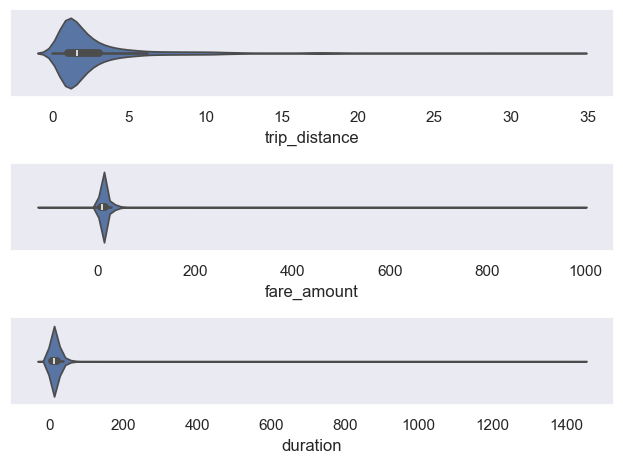

In [13]:
fig , axes = plt.subplots(3 , 1)

sns.violinplot(data=df1 , x='trip_distance' , ax=axes[0])
sns.violinplot(data=df1 , x='fare_amount' , ax=axes[1])
sns.violinplot(data=df1 , x='duration' , ax=axes[2])
plt.tight_layout()
plt.show()

<Axes: xlabel='trip_distance'>

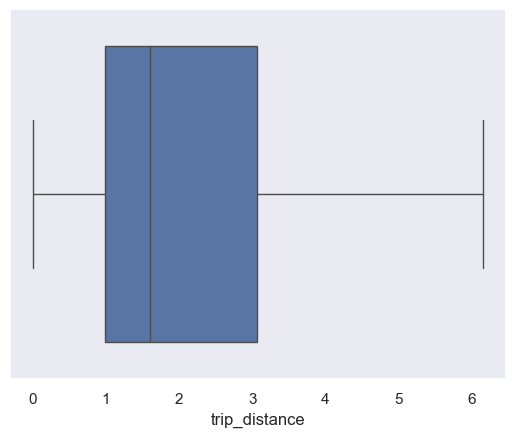

In [14]:
sns.boxplot(data=df1 , x='trip_distance' , showfliers=False)

<Axes: xlabel='fare_amount'>

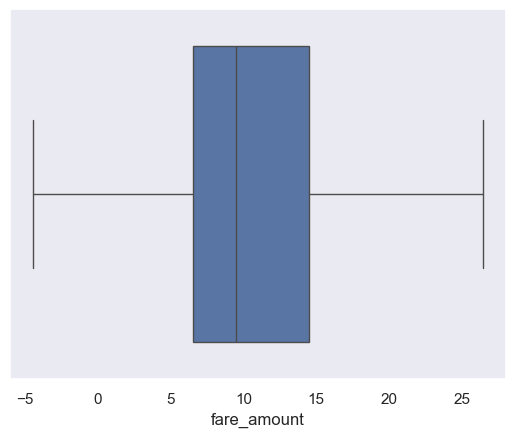

In [15]:
sns.boxplot(data=df1 , x='fare_amount' , showfliers=False)

<Axes: xlabel='duration'>

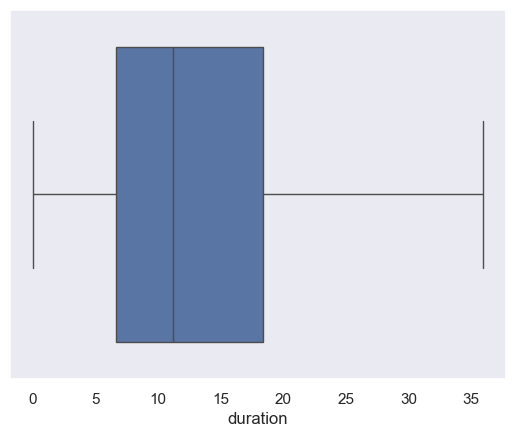

In [16]:
sns.boxplot(data=df1 , x='duration' , showfliers=False)

In [17]:
# Are trip distances of 0 bad data or very short trips rounded down?
df1['trip_distance'].sort_values(ascending=True)[:150]

22026    0.00
795      0.00
6908     0.00
13561    0.00
12238    0.00
         ... 
7383     0.00
7281     0.00
9155     0.00
5501     0.01
19644    0.01
Name: trip_distance, Length: 150, dtype: float64

In [18]:
sum(df1['trip_distance'] == 0)

148

In [19]:
df1['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [20]:
# Impute values less than $0 with 0
df1['fare_amount'][df1['fare_amount'] < 0]

314       -2.5
1646      -2.5
4423      -3.0
5448      -3.5
5758      -2.5
8204      -3.5
10281     -2.5
11204     -4.5
12944   -120.0
14714     -4.0
17602     -4.0
18565     -3.0
20317     -3.5
20698     -4.5
Name: fare_amount, dtype: float64

In [21]:
df1.loc[df1['fare_amount'] < 0 , 'fare_amount'] = 0
df1['fare_amount'][df1['fare_amount'] < 0]

Series([], Name: fare_amount, dtype: float64)

In [22]:
df1['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [23]:
iqr = df1['fare_amount'].quantile(0.75) - df1['fare_amount'].quantile(0.25)
print(iqr)
maximum = df1['fare_amount'].quantile(0.75) + (6 * iqr)
print(maximum)

8.0
62.5


In [24]:
for fare in df1['fare_amount']:
        df1.loc[df1['fare_amount'] > maximum , 'fare_amount'] = maximum

In [25]:
print(df1['fare_amount'].min())
print(df1['fare_amount'].max())

0.0
62.5


In [26]:
# Call .describe() for duration outliers
df1['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [27]:
# Impute a 0 for any negative values
df1.loc[df1['duration'] < 0 , 'duration'] = 0

In [28]:
# Impute the high outliers
iqr = df1['duration'].quantile(0.75) - df1['duration'].quantile(0.25)
print(iqr)
maximum = df1['duration'].quantile(0.75) + (6 * iqr)
print(maximum)

11.733333333333333
88.78333333333333


In [29]:
for fare in df1['duration']:
        df1.loc[df1['duration'] > maximum , 'duration'] = maximum

In [30]:
print(df1['duration'].min())
print(df1['duration'].max())

0.0
88.78333333333333


## Feature engineering

---
**Create `mean_distance` column**

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [31]:
# Create `pickup_dropoff` column
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)
df1['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [32]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [33]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [34]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df1['mean_distance'] = df1['pickup_dropoff']
# 2. Map `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

# Confirm that it worked
df1[(df1['PULocationID'] == 100) & (df1['DOLocationID'] == 202)]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
9304,112330762,1,2017-01-18 15:51:53,2017-01-18 16:31:14,1,5.3,1,N,100,202,...,26.0,0.0,0.5,2.0,0.0,0.3,28.8,39.35,100 202,5.3


In [35]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped_dict)

# Confirm that it worked
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [36]:
# Create 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b')

In [37]:
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,Mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,Apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,Dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643,Friday,Feb
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,59.560417,Sunday,Aug
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091,Monday,Sep
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000,Saturday,Jul


* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [38]:
# Create 'rush_hour' col
df1['rush_hour'] = df1['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df1.loc[(df1['day'] == 'Saturday') | (df1['day'] == 'Sunday') , 'rush_hour'] = 0

In [39]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,Mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,Apr,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,Dec,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,Apr,0


In [40]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [41]:
# Apply the `rush_hourizer()` function to the new column
df1.loc[(df1['day'] != 'Saturday') & (df1.day != 'Sunday') , 'rush_hour'] = df1.apply(rush_hourizer , axis=1)

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_70633/1505293423.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df1.loc[(df1['day'] != 'Saturday') & (df1.day != 'Sunday') , 'rush_hour'] = df1.apply(rush_hourizer , axis=1)


In [42]:
df1['rush_hour'].describe()

count    22699.000000
mean         0.296753
std          0.456837
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: rush_hour, dtype: float64

---
**Scatter Plot**

<Axes: xlabel='mean_duration', ylabel='fare_amount'>

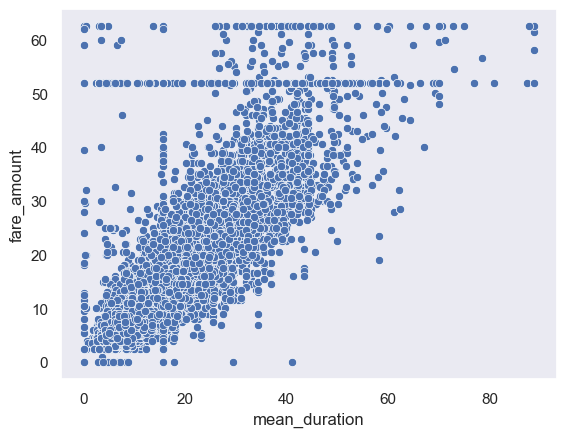

In [43]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.scatterplot(data = df1 , x='mean_duration' , y='fare_amount', markers='.')

In [44]:
df1[df1['fare_amount'] > 50]['fare_amount'].value_counts()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
55.0      6
51.5      6
53.0      4
52.5      4
61.0      3
62.0      3
55.5      3
56.0      3
56.5      3
58.5      2
59.5      2
61.5      2
57.0      2
54.0      2
58.0      1
54.7      1
54.5      1
Name: count, dtype: int64

In [45]:
# Set pandas to display all columns
pd.set_option('display.max_columns' , None)
df1[df1['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,Mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,Jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,Nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,Dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,Sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tuesday,Feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,Jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thursday,Aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,Sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sunday,Apr,0


---
**Isolate modeling variables**

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [47]:
df1.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,mean_distance,mean_duration,rush_hour
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,14.460555,2.913313,14.460555,0.296753
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,0.000000,0.000000,0.000000,0.000000
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000,1.010000,8.031481,0.000000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333,1.620000,11.556667,0.000000
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333,3.115625,17.321667,1.000000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,88.783333,33.920000,88.783333,1.000000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,11.947043,3.558993,10.080913,0.456837


In [48]:
df2 = df1.copy()
df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
        'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
        'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
        'pickup_dropoff', 'day', 'month'] , axis=1 , inplace=True)
df2.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


---
**Pair plot**

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

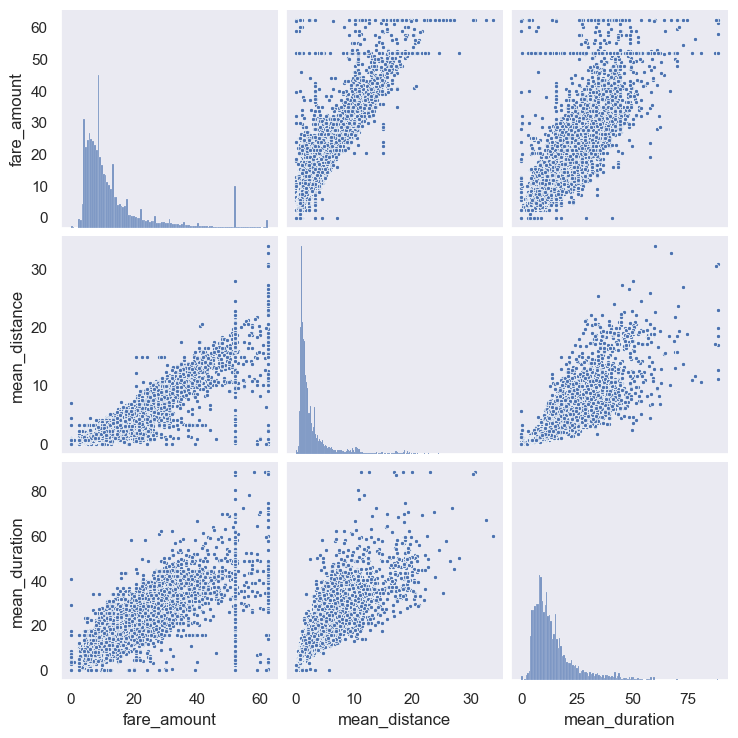

In [49]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount' , 'mean_distance' , 'mean_duration']] , markers='.' )

These variables all show linear correlation with each other. Investigate this further.

---
**Identify correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [50]:
# Correlation matrix to help determine most correlated variables
df2.corr()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


Visualize a correlation heatmap of the data.

<Axes: >

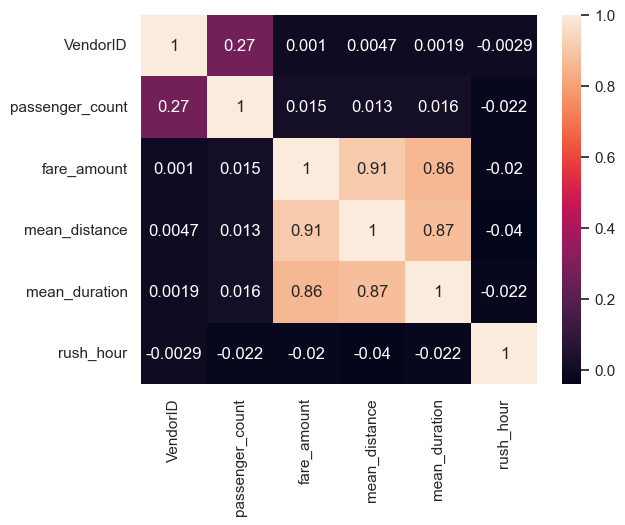

In [51]:
# Create correlation heatmap
sns.heatmap(df2.corr() , annot=True)

---
**Split data into outcome variable and features**

In [52]:
X = df2.drop(columns='fare_amount')
y = df2[['fare_amount']]

In [53]:
print(X.head())
print()
print(y.head())

   VendorID  passenger_count  mean_distance  mean_duration  rush_hour
0         2                6       3.521667      22.847222          0
1         1                1       3.108889      24.470370          0
2         1                1       0.881429       7.250000          1
3         2                1       3.700000      30.250000          0
4         2                1       4.435000      14.616667          0

   fare_amount
0         13.0
1         16.0
2          6.5
3         20.5
4         16.5


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

---
**Pre-process data**

Dummy encode categorical variables

In [54]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X , drop_first=True)

In [55]:
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


---
**Split data into training and test sets**

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [56]:
# Create training and testing sets
#### YOUR CODE HERE ####

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

---
**Standardize the data**

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [57]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [58]:
X_train_scaled

array([[-0.50301524,  0.8694684 ,  0.17616665, -0.64893329,  0.89286563],
       [-0.50301524, -0.60011281, -0.69829589,  1.54099045,  0.89286563],
       [ 0.27331093, -0.47829156, -0.57301906, -0.64893329, -1.11998936],
       ...,
       [-0.50301524, -0.45121122, -0.6788917 , -0.64893329, -1.11998936],
       [-0.50301524, -0.58944763, -0.85743597,  1.54099045, -1.11998936],
       [ 1.82596329,  0.83673851,  1.13212101, -0.64893329,  0.89286563]])

## Model Estimation

Instantiate your model and fit it to the training data.

In [59]:
# Fit your model to the training data
model = LinearRegression()

model.fit(X_train_scaled , y_train)

LinearRegression()

---
**Evaluate model**

**Train data**

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [60]:
y_pred_train = model.predict(X_train_scaled)

In [61]:
# Evaluate the model performance on the training data
print('R-squared' , model.score(X_train_scaled, y_train))
print('MAE' , mean_absolute_error(y_train , y_pred_train))
print('MSE' , mean_squared_error(y_train , y_pred_train))
print('RMSE' , np.sqrt(mean_squared_error(y_train , y_pred_train)))

R-squared 0.8398434585044773
MAE 2.1866664167754157
MSE 17.88973296349268
RMSE 4.229625629236313


---
**Test data**

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [62]:
X_test_scaled = scaler.transform(X_test)
y_pred_test = model.predict(X_test_scaled)

In [63]:
# Scale the X_test data
model.fit(X_test_scaled , y_test)

LinearRegression()

In [64]:
# Evaluate the model performance on the testing data
y_pred_test = model.predict(X_test_scaled)
print('R-squared' , model.score(X_test_scaled , y_test))
print('MAE' , mean_absolute_error(y_test , y_pred_test))
print('MSE' , mean_squared_error(y_test , y_pred_test))
print('RMSE' , np.sqrt(mean_squared_error(y_test , y_pred_test)))

R-squared 0.8688418048100106
MAE 2.1126188601915166
MSE 14.263006975751834
RMSE 3.7766396407059855


---
## Results

In [65]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual':y_test['fare_amount'],
                      'predicted':y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']

In [66]:
results.head()

,actual,predicted,residual
5818,14.0,12.346025,1.653975
18134,28.0,16.365952,11.634048
4655,5.5,6.587892,-1.087892
7378,15.5,16.309853,-0.809853
13914,9.5,10.291103,-0.791103


<Axes: xlabel='predicted', ylabel='actual'>

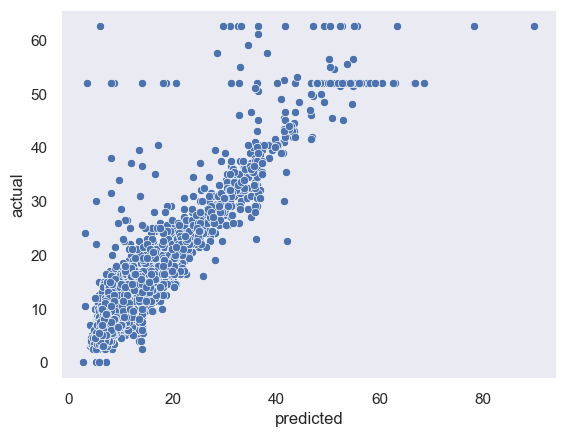

In [67]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(data=results , x='predicted' , y='actual')

<Axes: xlabel='residual', ylabel='Count'>

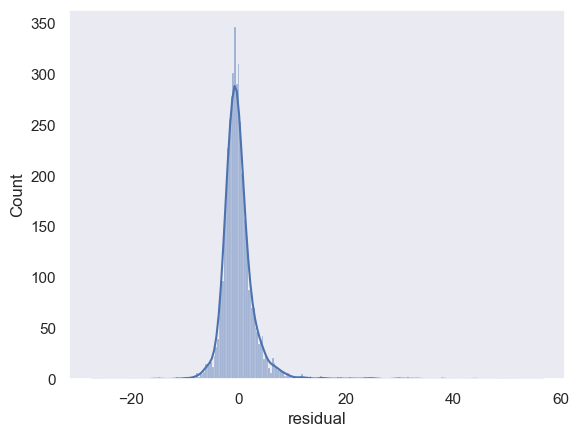

In [68]:
# Visualize the distribution of the `residuals`
sns.histplot(data=results, x='residual', kde=True)

In [69]:
# Calculate residual mean
results['residual'].mean()

7.762757641784354e-16

<Axes: xlabel='predicted', ylabel='residual'>

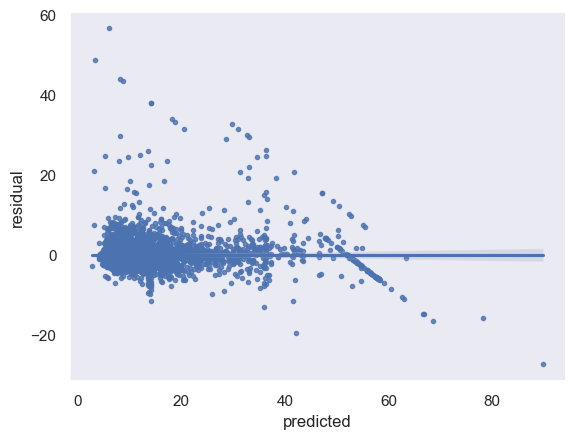

In [70]:
# Create a scatterplot of `residuals` over `predicted`
sns.regplot(data=results , x='predicted' , y='residual' , marker='.')

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  22699 non-null  int64  
 1   mean_distance    22699 non-null  float64
 2   mean_duration    22699 non-null  float64
 3   rush_hour        22699 non-null  int64  
 4   VendorID_2       22699 non-null  bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 731.6 KB


In [72]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual':y_test['fare_amount'],
                      'predicted':y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']

In [73]:
results.head()

,actual,predicted,residual
5818,14.0,12.346025,1.653975
18134,28.0,16.365952,11.634048
4655,5.5,6.587892,-1.087892
7378,15.5,16.309853,-0.809853
13914,9.5,10.291103,-0.791103


### Visualize Model Results

Create a scatterplot to visualize `actual` vs. `predicted`.

<Axes: xlabel='predicted', ylabel='actual'>

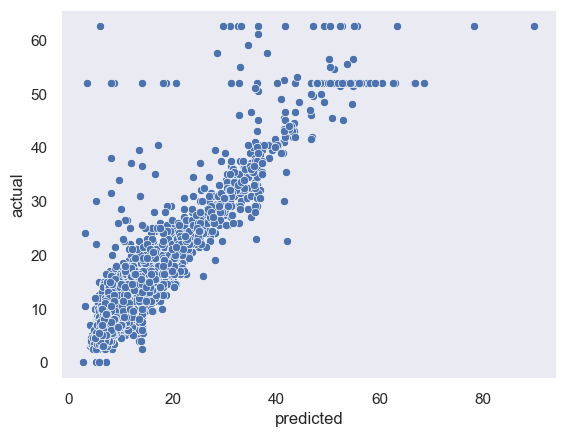

In [74]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(data=results , x='predicted' , y='actual')

Visualize the distribution of the `residuals` using a histogram.

<Axes: xlabel='residual', ylabel='Count'>

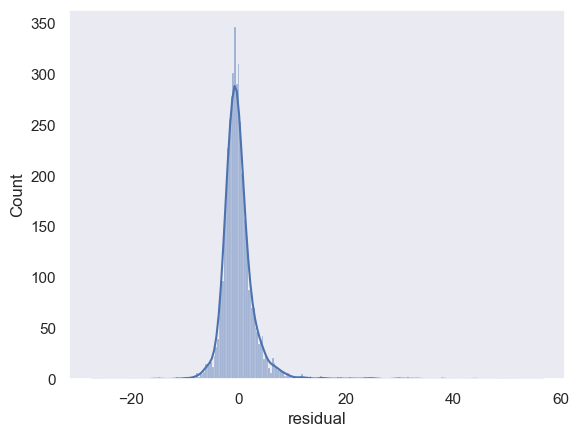

In [75]:
# Visualize the distribution of the `residuals`
sns.histplot(data=results, x='residual', kde=True)

In [76]:
# Calculate residual mean
results['residual'].mean()

7.762757641784354e-16

Create a scatterplot of `residuals` over `predicted`.

<Axes: xlabel='predicted', ylabel='residual'>

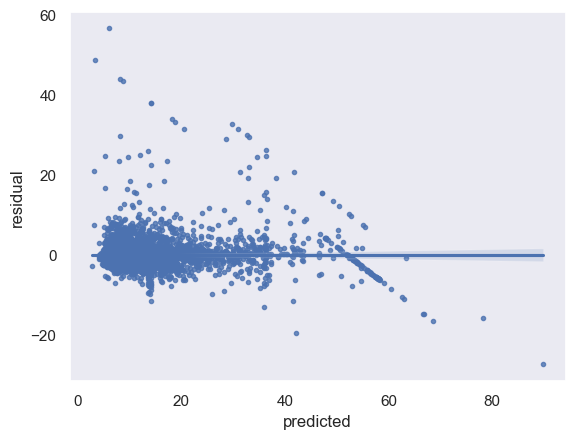

In [77]:
# Create a scatterplot of `residuals` over `predicted`
sns.regplot(data=results , x='predicted' , y='residual' , marker='.')

### Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  22699 non-null  int64  
 1   mean_distance    22699 non-null  float64
 2   mean_duration    22699 non-null  float64
 3   rush_hour        22699 non-null  int64  
 4   VendorID_2       22699 non-null  bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 731.6 KB


In [79]:
# Output the model's coefficients
model.coef_

array([[0.02196379, 7.32092374, 2.84139502, 0.22159236, 0.03474851]])

In [80]:
len(model.coef_.flatten())

5

In [81]:
coefficients = pd.DataFrame(columns=X.columns)

In [82]:
coefficients.shape

(0, 5)

In [83]:
len(coefficients)

0

In [84]:
coefficients.loc[1] = model.coef_.flatten()

In [85]:
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
1,0.021964,7.320924,2.841395,0.221592,0.034749
